In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
import os
import urllib.request

TITANIC_PATH = os.path.join("datasets", "titanic")
DOWNLOAD_URL = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/titanic/"

def fetch_titanic_data(url=DOWNLOAD_URL, path=TITANIC_PATH):
    if not os.path.isdir(path):
        os.makedirs(path)
    for filename in ("train.csv", "test.csv"):
        filepath = os.path.join(path, filename)
        if not os.path.isfile(filepath):
            print("Downloading", filename)
            urllib.request.urlretrieve(url + filename, filepath)

fetch_titanic_data()

In [3]:

def load_titanic_data(filename, titanic_path=TITANIC_PATH):
    csv_path = os.path.join(titanic_path, filename)
    return pd.read_csv(csv_path)

In [4]:
df1 = load_titanic_data("train.csv")
df2 = load_titanic_data("test.csv")

In [5]:
df1.shape

(891, 12)

In [6]:
df2.shape

(418, 11)

In [7]:
df = df1.append(df2)

In [8]:
df.shape

(1309, 12)

In [9]:
df.sample(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
386,387,0.0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S
73,965,NaN,1,"Ovies y Rodriguez, Mr. Servando",male,28.5,0,0,PC 17562,27.7208,D43,C
651,652,1.0,2,"Doling, Miss. Elsie",female,18.0,0,1,231919,23.0000,NaN,S
72,73,0.0,2,"Hood, Mr. Ambrose Jr",male,21.0,0,0,S.O.C. 14879,73.5000,NaN,S
691,692,1.0,3,"Karun, Miss. Manca",female,4.0,0,1,349256,13.4167,NaN,C
796,797,1.0,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S
66,67,1.0,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,0,0,C.A. 29395,10.5000,F33,S
139,1031,NaN,3,"Goodwin, Mr. Charles Frederick",male,40.0,1,6,CA 2144,46.9000,NaN,S
337,1229,NaN,3,"Elias, Mr. Joseph",male,39.0,0,2,2675,7.2292,NaN,C
81,82,1.0,3,"Sheerlinck, Mr. Jan Baptist",male,29.0,0,0,345779,9.5000,NaN,S


In [10]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [11]:
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [12]:
df.Embarked.value_counts(normalize=True)

S    0.699311
C    0.206580
Q    0.094109
Name: Embarked, dtype: float64

In [13]:
df["Title"] = df["Name"].str.extract("([A-Z][a-z]*)\.", expand=False)
df["Title"].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64

In [14]:
df['Age'].fillna(df.groupby("Title")["Age"].transform("median"),inplace=True)
#df.groupby("Title")["Age"].transform["median"]

In [15]:
df['Title']=df['Title'].replace(['Ms','Mlle'],'Miss')
df['Title']=df['Title'].replace(['Mme','Countess','Lady','Dona'],'Mrs')
df['Title']=df['Title'].replace(['Dr','Major','Col','Sir','Rev','Jonkheer','Capt','Don'],'Mr')

In [16]:
df['Senior']=df['Age'].map(lambda s:1 if s>70 else 0)

In [17]:
df.groupby('Sex')['Age'].mean()

Sex
female    28.362840
male      30.023824
Name: Age, dtype: float64

In [18]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Senior
count,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.432518,0.498854,0.385027,33.295479,0.004584
std,378.020061,0.486592,0.837836,13.163773,1.041658,0.865560,51.758668,0.067573
min,1.000000,0.000000,1.000000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000
50%,655.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200,0.000000
75%,982.000000,1.000000,3.000000,35.500000,1.000000,0.000000,31.275000,0.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  Title        1309 non-null   object 
 13  Senior       1309 non-null   int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 153.4+ KB


In [20]:
del df['Cabin']

In [21]:
df['Fare'].fillna(df['Fare'].mean(),inplace=True)

In [22]:
df['Family'] = df['SibSp'] + df['Parch'] +1

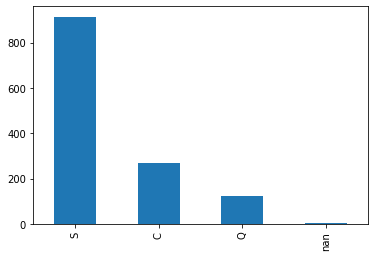

In [23]:
df.Embarked.value_counts(dropna=False).plot(kind='bar')

In [24]:
df['Embarked'] = df['Embarked'].fillna('S')

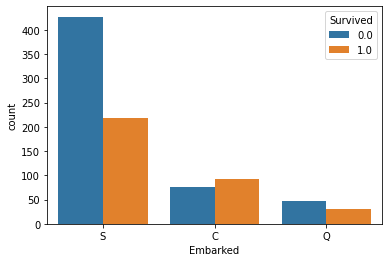

In [25]:
sns.countplot(x="Embarked",hue='Survived', data=df)

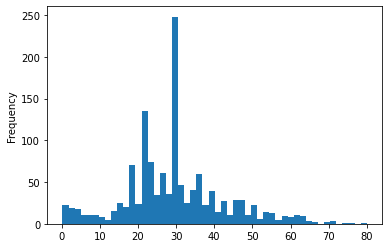

In [26]:
df.Age.plot(kind='hist',bins=50)

In [27]:
df.Family.value_counts()

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: Family, dtype: int64

In [28]:
df['Single']=df.Family<2
df['Small']=(df.Family>1)&(df.Family<5)
df['Medium']=(df.Family>4)&(df.Family<7)
df['Large']=df.Family>6

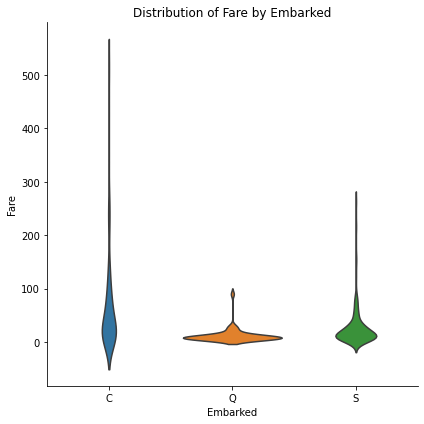

In [29]:
sns.catplot(x="Embarked", y="Fare", kind="violin", inner=None, data=df, height=6, order=['C', 'Q','S'])
plt.title('Distribution of Fare by Embarked')
plt.tight_layout()

In [30]:
del df['Name']

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   float64
 9   Embarked     1309 non-null   object 
 10  Title        1309 non-null   object 
 11  Senior       1309 non-null   int64  
 12  Family       1309 non-null   int64  
 13  Single       1309 non-null   bool   
 14  Small        1309 non-null   bool   
 15  Medium       1309 non-null   bool   
 16  Large        1309 non-null   bool   
dtypes: bool(4), float64(3), int64(6), object(4)
memory usage: 180.6+ KB


In [32]:
df.drop(['PassengerId', 'Ticket'],axis=1,inplace=True)

In [33]:
df_dummies=pd.get_dummies(df, drop_first=True)

In [34]:
df_train=df_dummies[:891]
df_test=df_dummies[891:]

In [35]:
df_train.shape,df_test.shape

((891, 18), (418, 18))

In [36]:
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Senior,Family,Single,Small,Medium,Large,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,0.0,3,22.0,1,0,7.2500,0,2,False,True,False,False,1,0,1,0,1,0
1,1.0,1,38.0,1,0,71.2833,0,2,False,True,False,False,0,0,0,0,0,1
2,1.0,3,26.0,0,0,7.9250,0,1,True,False,False,False,0,0,1,1,0,0
3,1.0,1,35.0,1,0,53.1000,0,2,False,True,False,False,0,0,1,0,0,1
4,0.0,3,35.0,0,0,8.0500,0,1,True,False,False,False,1,0,1,0,1,0


In [37]:
del df_train['Survived']

In [38]:
y=df1['Survived']

In [39]:
    g=GaussianNB()
    b=BernoulliNB()
    k=KNeighborsClassifier()
    svc=SVC()
    d=DecisionTreeClassifier()
    log=LogisticRegression()
    gbc=GradientBoostingClassifier()
    mn=MultinomialNB()
    r=RandomForestClassifier()
    ab=AdaBoostClassifier()
    


algorithms = [g,b,k,log,gbc,r,d]
names=['GaussianNB','BernoulliNB','K Nearest','Logistic','GradientBoosting','RandomForest','Decision Tree']

In [40]:
def algo_test(X,y,algorithms=algorithms, names=names):
    
    for i in range(len(algorithms)):
        algorithms[i]=algorithms[i].fit(X,y)
    accuracy=[]
    precision=[]
    recall=[]
    f1=[]
    for i in range(len(algorithms)):
        accuracy.append(accuracy_score(y,algorithms[i].predict(X)))
        precision.append(precision_score(y,algorithms[i].predict(X)))
        recall.append(recall_score(y,algorithms[i].predict(X)))
        f1.append(f1_score(y,algorithms[i].predict(X)))
    metrics = pd.DataFrame(columns=["Accuracy","Precision","Recall","F1"],index=names)
    metrics['Accuracy']=accuracy
    metrics['Precision']=precision
    metrics['Recall']=recall
    metrics['F1']=f1
    return metrics.sort_values('F1', ascending=False)

In [41]:
algo_test(df_train,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


,Accuracy,Precision,Recall,F1
RandomForest,0.977553,0.987879,0.953216,0.970238
Decision Tree,0.977553,0.993865,0.947368,0.970060
GradientBoosting,0.895623,0.897764,0.821637,0.858015
Logistic,0.830527,0.799373,0.745614,0.771558
GaussianNB,0.820426,0.764535,0.769006,0.766764
BernoulliNB,0.810325,0.758209,0.742690,0.750369
K Nearest,0.818182,0.794118,0.710526,0.750000


In [54]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [55]:
y_test= algorithms[0].predict(df_train)

In [56]:
print(classification_report(y_test,y))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       547
           1       0.77      0.76      0.77       344

    accuracy                           0.82       891
   macro avg       0.81      0.81      0.81       891
weighted avg       0.82      0.82      0.82       891



In [57]:
confusion_matrix(y_test,y)

array([[468,  79],
       [ 81, 263]])

In [58]:
df_test.shape

(418, 17)

In [43]:
df_test.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Senior,Family,Single,Small,Medium,Large,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,NaN,3,34.5,0,0,7.8292,0,1,True,False,False,False,1,1,0,0,1,0
1,NaN,3,47.0,1,0,7.0000,0,2,False,True,False,False,0,0,1,0,0,1
2,NaN,2,62.0,0,0,9.6875,0,1,True,False,False,False,1,1,0,0,1,0
3,NaN,3,27.0,0,0,8.6625,0,1,True,False,False,False,1,0,1,0,1,0
4,NaN,3,22.0,1,1,12.2875,0,3,False,True,False,False,0,0,1,0,0,1


In [44]:
del df_test["Survived"]

In [45]:
prediction = d.predict(df_test)

In [46]:
prediction

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [47]:
df_test.head(418)

,Pclass,Age,SibSp,Parch,Fare,Senior,Family,Single,Small,Medium,Large,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,3,34.5,0,0,7.8292,0,1,True,False,False,False,1,1,0,0,1,0
1,3,47.0,1,0,7.0000,0,2,False,True,False,False,0,0,1,0,0,1
2,2,62.0,0,0,9.6875,0,1,True,False,False,False,1,1,0,0,1,0
3,3,27.0,0,0,8.6625,0,1,True,False,False,False,1,0,1,0,1,0
4,3,22.0,1,1,12.2875,0,3,False,True,False,False,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,29.0,0,0,8.0500,0,1,True,False,False,False,1,0,1,0,1,0
414,1,39.0,0,0,108.9000,0,1,True,False,False,False,0,0,0,0,0,1
415,3,38.5,0,0,7.2500,0,1,True,False,False,False,1,0,1,0,1,0
416,3,29.0,0,0,8.0500,0,1,True,False,False,False,1,0,1,0,1,0


In [48]:
result=df2[["PassengerId"]]

In [49]:
result["Survived"]=prediction

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
result.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,1
3,895,1
4,896,1


In [51]:
result.shape

(418, 2)

In [52]:
result.to_csv("submission.csv",index=False)